In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load data
awards_players_df = pd.read_csv('../data/awards_players.csv')
coaches_df = pd.read_csv('../data/coaches.csv')
players_teams_df = pd.read_csv('../data/players_teams.csv')
players_df = pd.read_csv('../data/players.csv')
series_post_df = pd.read_csv('../data/series_post.csv')
teams_post_df = pd.read_csv('../data/teams_post.csv')
teams_df = pd.read_csv('../data/teams.csv')

## Awards players dataset exploration

### Number of awards per player 

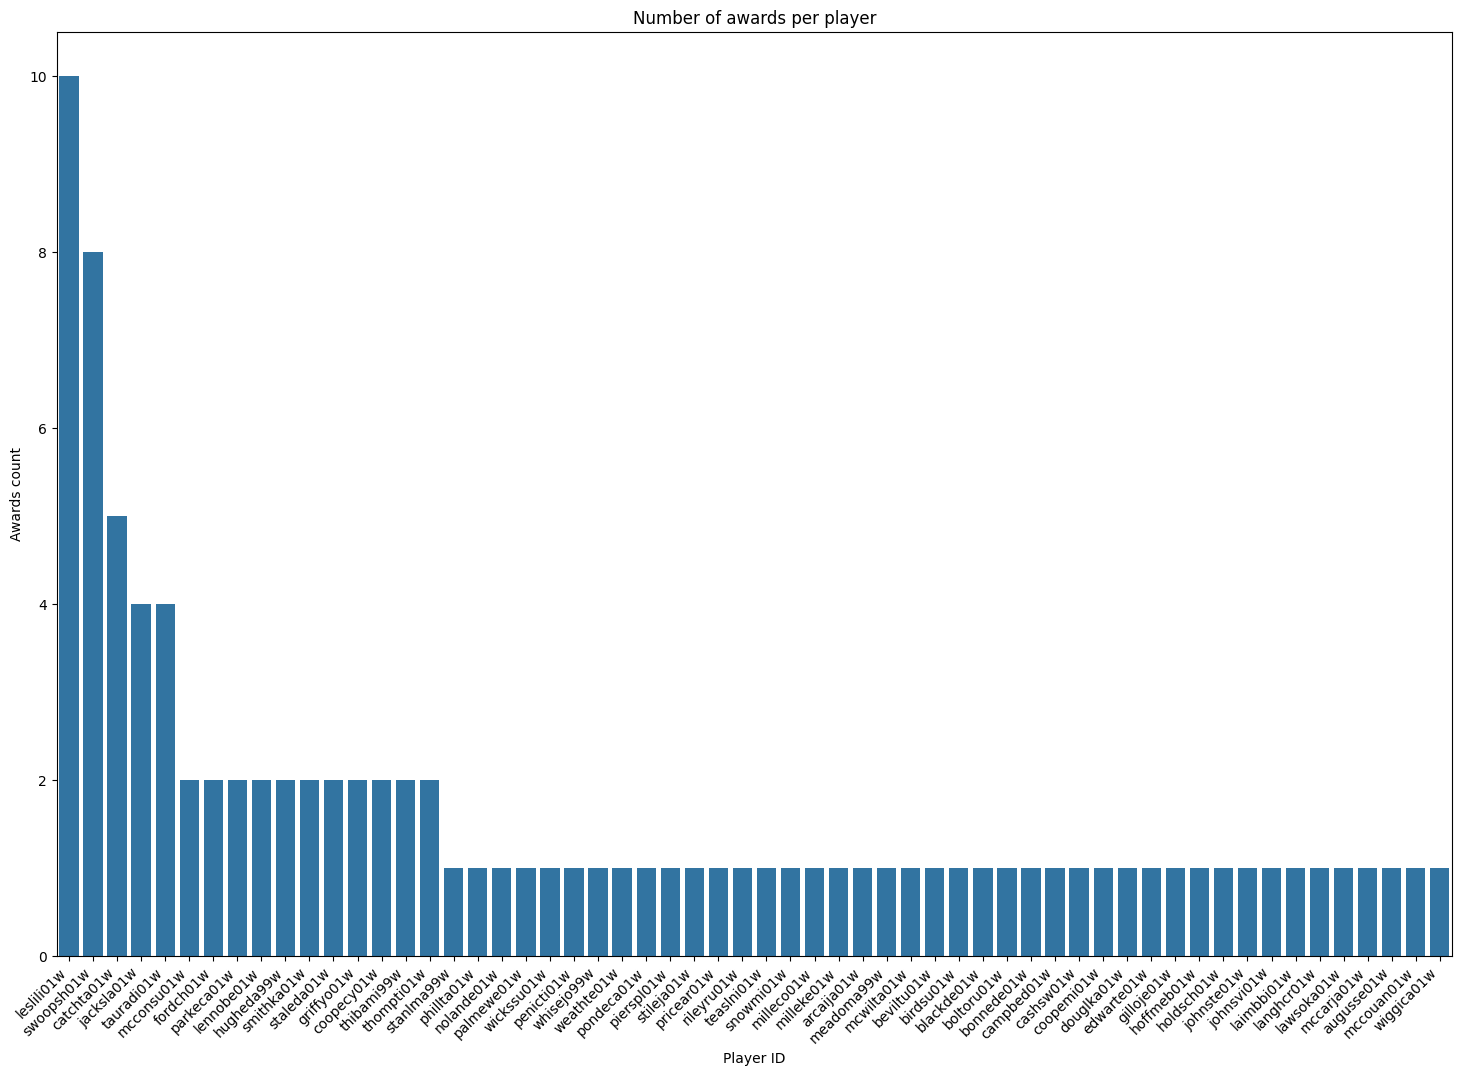

In [39]:
# unique awards
awards_players_df['award'].nunique() # 12 types of awards

# number of awards for each player
player_awards_count = awards_players_df.groupby('playerID')['award'].count().reset_index()

# Sort players based on the number of awards in descending order
player_awards_count = player_awards_count.sort_values(by='award', ascending=False)

# Create the bar plot
plt.figure(figsize=(18, 12))
sns.barplot(x='playerID', y='award', data=player_awards_count)
plt.title('Number of awards per player')
plt.xlabel('Player ID')
plt.ylabel('Awards count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for playerID labels
plt.show()

## Coaches dataset exploration

### Wins and losses vs post season wins and losses

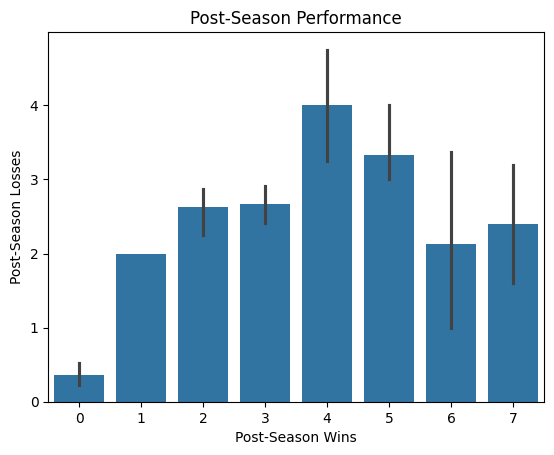

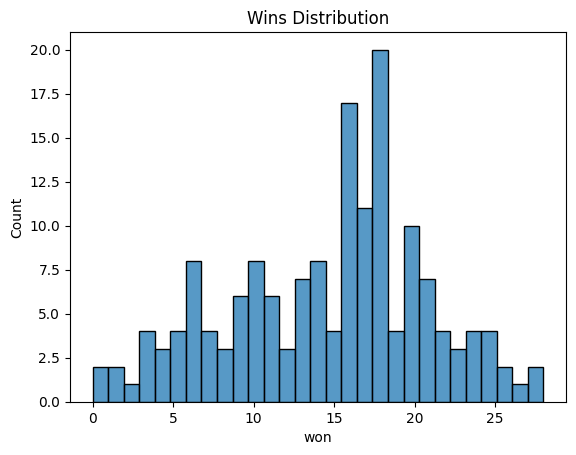

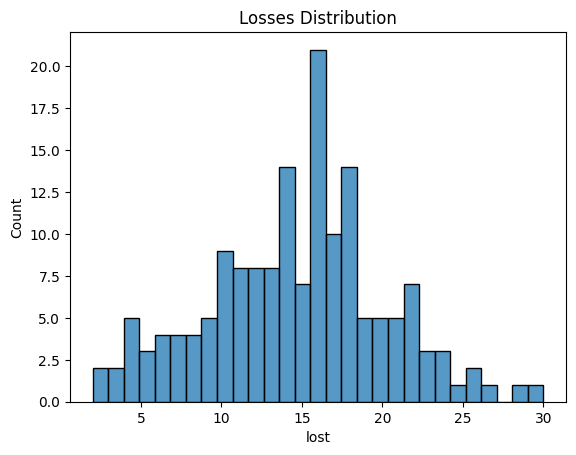

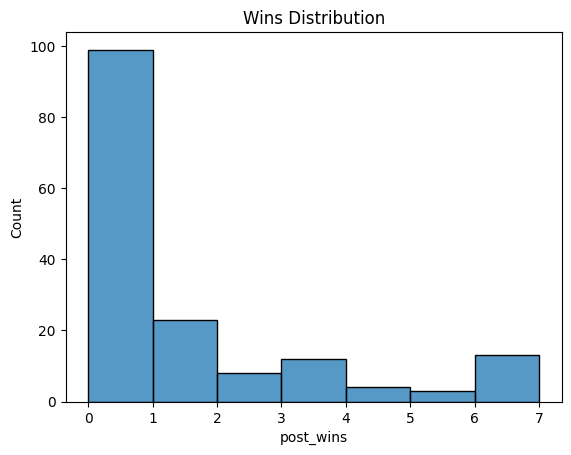

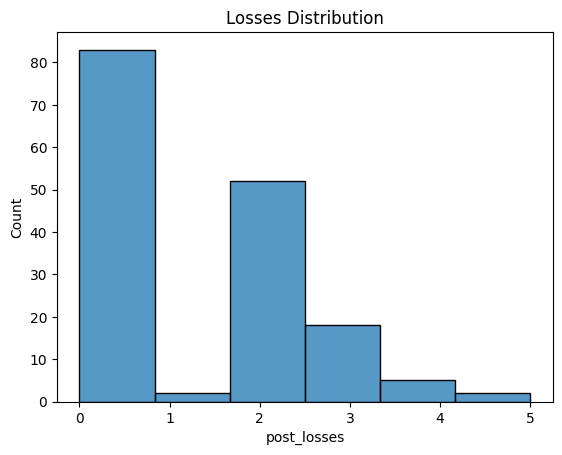

In [19]:
# Bar plot of post-season wins and losses
sns.barplot(x='post_wins', y='post_losses', data=coaches_df)
plt.title('Post-Season Performance')
plt.xlabel('Post-Season Wins')
plt.ylabel('Post-Season Losses')
plt.show()

sns.histplot(coaches_df['won'],  bins=29)
plt.title('Wins Distribution')
plt.show()

sns.histplot(coaches_df['lost'], bins=29)
plt.title('Losses Distribution')
plt.show()

sns.histplot(coaches_df['post_wins'],  bins=7)
plt.title('Wins Distribution')
plt.show()

sns.histplot(coaches_df['post_losses'], bins=6)
plt.title('Losses Distribution')
plt.show()

### Barplot with wins and losses for each coach

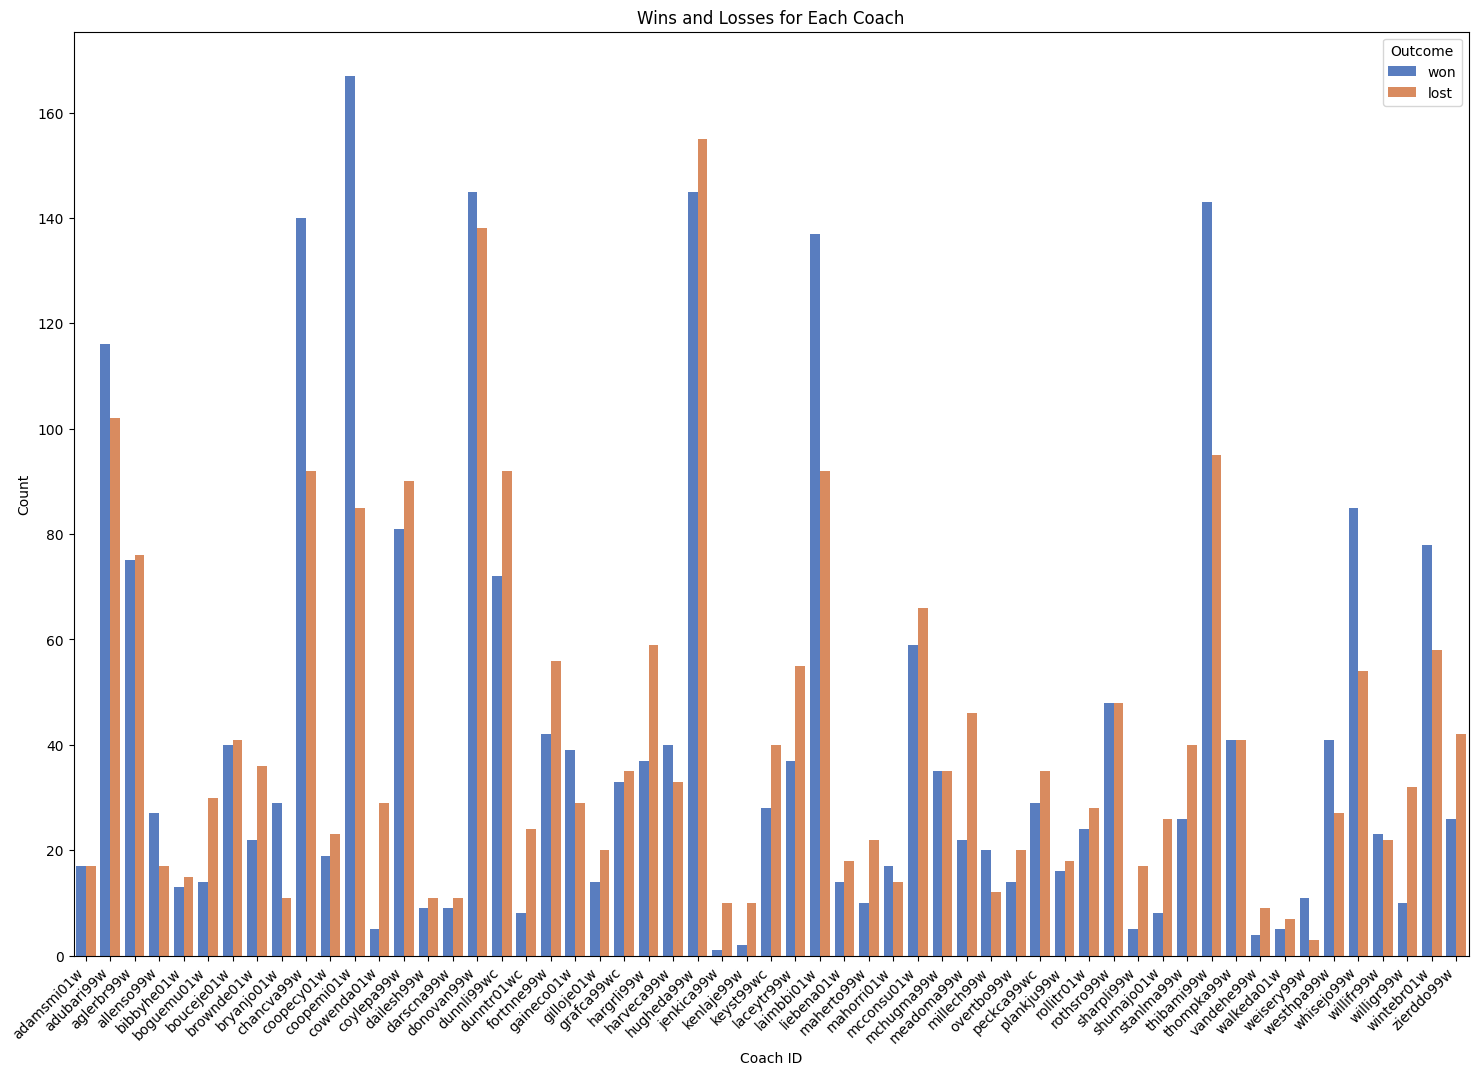

In [40]:
# Create a new DataFrame with wins and losses for each coach
coach_wins_losses = coaches_df.groupby('coachID').agg({'won': 'sum', 'lost': 'sum'}).reset_index()

# Melt the DataFrame for Seaborn's barplot
coach_wins_losses_melted = coach_wins_losses.melt(id_vars='coachID', value_vars=['won', 'lost'], var_name='Outcome', value_name='Count')

# Create the histogram
plt.figure(figsize=(18, 12))
sns.barplot(x='coachID', y='Count', hue='Outcome', data=coach_wins_losses_melted, palette='muted')
plt.title('Wins and Losses for Each Coach')
plt.xlabel('Coach ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()


## Players dataset exploration

### Plots

In [68]:
# PLAYERS

# player colleges

# plots here


### Mean values for player attributes

In [67]:
# Drop rows with 0 values 
players_df.drop(players_df[players_df['height'] == 0].index, inplace = True)
players_df.drop(players_df[players_df['weight'] == 0].index, inplace = True)

# Average height
average_height = players_df['height'].mean()
print(average_height) # 71.9 inches

average_weight = players_df['weight'].mean()
print(average_weight) # 167.77 pounds

71.91472868217055
167.77260981912144


In [ ]:
# Plot for number of players in each position

# C, F, F-C, G, F-G